In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
predictions = pd.read_csv('/home/ubuntu/csvs/predictions.csv')

In [56]:
arima = pd.read_csv('/home/ubuntu/csvs/arima.csv')

In [57]:
etfs = pd.read_csv('/home/ubuntu/csvs/etfs_pivot.csv')

In [58]:
spy = etfs[['date','SPY']]

In [59]:
price_date = pd.date_range(start='2018-03-17', end='2019-03-15')

In [60]:
spy['date'] = pd.to_datetime(spy['date'])

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [61]:
spy_short = spy[spy['date'].isin(price_date)]
spy_short

,date,SPY
1461,2018-03-17,268.9819
1462,2018-03-18,268.9819
1463,2018-03-19,265.3425
1464,2018-03-20,265.7937
1465,2018-03-21,265.2836
1466,2018-03-22,258.6523
1467,2018-03-23,253.1392
1468,2018-03-24,253.1392
1469,2018-03-25,253.1392
1470,2018-03-26,260.0649


In [62]:
arima['date'] = pd.to_datetime(arima['date'])
predictions['date'] = pd.to_datetime(predictions['date'])

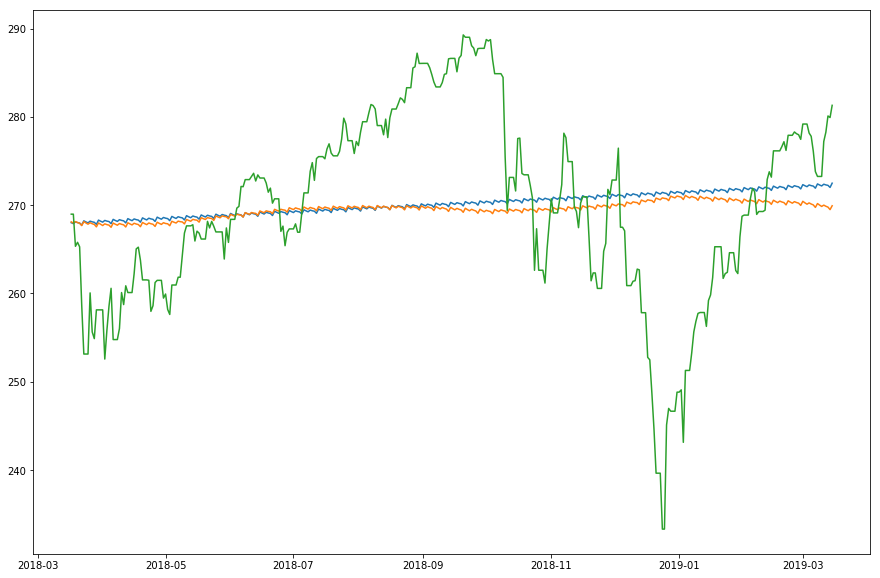

In [69]:
plt.figure(figsize=[15,10])

plt.plot(arima['date'], arima['SPY'])
plt.plot(predictions['date'], predictions['SPY'])
plt.plot(spy_short['date'], spy_short['SPY'])
plt.show()

In [70]:
check = pd.DataFrame(index=spy_short['date'])

In [71]:
check['price'] = np.array(spy_short['SPY'])
check['arima'] = np.array(arima['SPY'])
check['hybrid'] = np.array(predictions['SPY'])

In [72]:
check['arima_residuals'] = check['price'] - check['arima']
check['hybrid_residuals'] = check['price'] - check['hybrid']

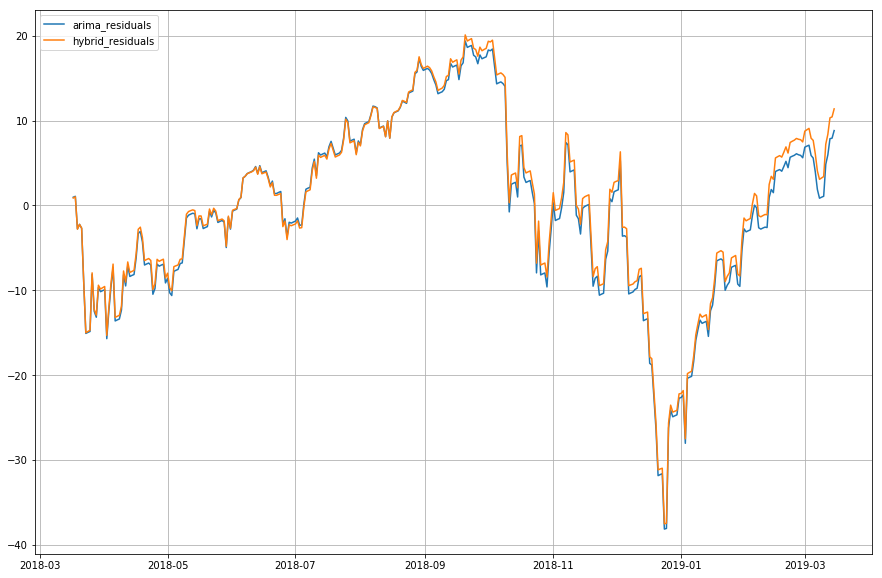

In [73]:
plt.figure(figsize=[15,10])
plt.grid()

plt.plot(check.index, check['arima_residuals'])
plt.plot(check.index, check['hybrid_residuals'])

plt.legend(loc='upper left')

In [52]:
for ix, row in check.iterrows():
    print(row[0], '-->', row[1], '-->', row[2])

268.9819 --> 268.018616643317 --> 269.9124934343173
268.9819 --> 267.91133252205327 --> 269.8039378267713
265.3425 --> 268.10748677796863 --> 269.99877863473444
265.7937 --> 268.0272519157261 --> 269.9172092244953
265.2836 --> 267.9775439175924 --> 269.866180625852
258.6523 --> 267.74136944918024 --> 269.6286874642788
253.1392 --> 268.2252482606039 --> 270.1114839745626
253.1392 --> 268.10230713479933 --> 269.98744898431715
253.1392 --> 267.99502301353584 --> 269.8790304674543
260.0649 --> 268.1911772694501 --> 270.0740469899091
255.6407 --> 268.1109424072078 --> 269.99266497667344
254.8853 --> 268.06123440907453 --> 269.94179778740846
258.1422 --> 267.825059940662 --> 269.7044533990284
258.1422 --> 268.3089387520854 --> 270.18680668917347
258.1422 --> 268.18599762628054 --> 270.0625434131381
258.1422 --> 268.07871350501665 --> 269.9540359661449
252.5703 --> 268.2748677609316 --> 270.1498628733507
255.8075 --> 268.1946328986894 --> 270.0692107785952
258.5444 --> 268.1449249005568 --> 2